<a href="https://colab.research.google.com/github/yesol-ba/portfolio/blob/main/Analyzing_Anxiety_Score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
# Installs
! pip install umap-learn
! pip install scikit-plot
! pip install jieba
! pip install newspaper3k
! pip install spacy
! pip install nltk
! pip install -U scikit-learn
! pip install tokenwiser
! pip install afinn
! pip install -U spacy
! pip install spacytextblob
! pip install vaderSentiment

     |████████████████████████████████| 86 kB 2.6 MB/s 
     |████████████████████████████████| 1.1 MB 28.1 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=7887a030ea935f692bf2b208060d8054e17df7d0f52506da965fde908ed4db36
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=ffad3204c6c83cdd6d64a327fa6bf7f06186281a1180b575466ed8e9367adaa6
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent
     |████████████████████████████████| 211 kB 4.2 MB/s 
     |████████████████████████████████| 87 kB 4.4 MB/s 
     |████████████████████████████████| 7.4 MB 49.6 MB/s 
     |████████████████████████████████| 81 kB 8.1 MB/s 
  Created wheel for tinysegmenter: filename=tinysegmenter-0.3-py3-none-any.whl size=1

In [ ]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn import metrics 
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
from scipy.spatial.distance import pdist, squareform

from sklearn import metrics 
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

import scikitplot as skplt

import sys
sys.setrecursionlimit(10000)

import spacy
from spacy import cli
from spacytextblob.spacytextblob import SpacyTextBlob

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

%matplotlib inline  
import nltk
from nltk import word_tokenize, sent_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer,TfidfVectorizer  
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import jieba
from afinn import Afinn

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Reading the Data

In [ ]:
# Reading the Data
data = pd.read_csv("https://raw.githubusercontent.com/David855008/820_project/main/data.csv")
text = pd.read_csv("https://raw.githubusercontent.com/David855008/820_project/main/text.csv")

# Exploratory Data Analysis


## About the Data:

In [ ]:
data.head()

,score,gender,age,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50
0,32,2,56,2,2,2,1,2,1,2,2,1,2,1,1,2,2,2,1,1,1,1,2,2,1,1,1,1,1,1,1,2,1,1,1,1,2,1,1,1,1,1,1,2,1,1,1,2,1,1,1,2,2
1,17,1,30,1,2,1,1,2,1,1,2,1,2,1,1,2,2,2,2,1,1,2,2,2,2,1,1,1,1,2,1,1,2,2,1,2,2,1,2,1,2,2,2,1,1,2,2,2,2,2,2,2,2
2,41,1,32,2,1,1,2,1,1,1,1,1,1,1,2,1,2,1,2,1,2,2,2,1,1,2,1,1,1,1,1,2,1,1,2,1,1,1,1,1,2,1,1,1,1,1,2,1,1,2,1,1,2
3,31,1,29,1,2,2,1,1,1,1,2,2,2,1,2,2,2,1,1,2,1,2,1,2,1,1,2,1,1,1,1,2,2,2,2,2,1,1,1,1,2,1,1,1,2,1,1,1,1,1,2,1,2
4,35,1,23,1,2,2,1,1,2,1,1,1,1,1,2,2,2,1,1,1,2,2,2,1,1,1,2,1,2,1,1,1,2,1,2,1,1,1,1,1,2,1,1,2,1,1,1,1,1,2,1,1,2


In [ ]:
data.shape

(5410, 53)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 53 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   score   5410 non-null   int64
 1   gender  5410 non-null   int64
 2   age     5410 non-null   int64
 3   Q1      5410 non-null   int64
 4   Q2      5410 non-null   int64
 5   Q3      5410 non-null   int64
 6   Q4      5410 non-null   int64
 7   Q5      5410 non-null   int64
 8   Q6      5410 non-null   int64
 9   Q7      5410 non-null   int64
 10  Q8      5410 non-null   int64
 11  Q9      5410 non-null   int64
 12  Q10     5410 non-null   int64
 13  Q11     5410 non-null   int64
 14  Q12     5410 non-null   int64
 15  Q13     5410 non-null   int64
 16  Q14     5410 non-null   int64
 17  Q15     5410 non-null   int64
 18  Q16     5410 non-null   int64
 19  Q17     5410 non-null   int64
 20  Q18     5410 non-null   int64
 21  Q19     5410 non-null   int64
 22  Q20     5410 non-null   int64
 23  Q21     5410 

In [ ]:
data.describe()

,score,gender,age,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50
count,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000,5410.000000
mean,32.316451,1.562662,30.416081,1.639187,1.601479,1.675416,1.472274,1.322736,1.204806,1.238817,1.589834,1.450462,1.458410,1.148244,1.592421,1.697597,1.634566,1.548244,1.455638,1.366728,1.719224,1.558965,1.429020,1.509057,1.203512,1.405360,1.433641,1.328835,1.190943,1.087800,1.154344,1.623845,1.444732,1.187800,1.634566,1.267652,1.443068,1.294270,1.153050,1.115342,1.773013,1.363771,1.203327,1.296488,1.129760,1.188725,1.391682,1.319224,1.274122,1.275046,1.235675,1.360628,1.842329
std,9.471427,0.510431,18.206527,0.492069,0.505249,0.480731,0.510989,0.480822,0.423709,0.445069,0.512524,0.515112,0.514019,0.376100,0.510979,0.479429,0.503736,0.522715,0.520224,0.501507,0.467565,0.510509,0.512957,0.523095,0.426288,0.508759,0.507055,0.485318,0.420354,0.314585,0.390335,0.500235,0.518466,0.415363,0.505568,0.465969,0.515065,0.476771,0.397179,0.348259,0.442948,0.499972,0.424856,0.481960,0.366591,0.420916,0.516152,0.490566,0.473064,0.471548,0.451884,0.500585,0.386141
min,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
50%,34.000000,2.000000,27.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
75%,39.000000,2.000000,36.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000
max,50.000000,3.000000,900.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.

In [ ]:
# Checking for Null Values:
data.isna().sum()

score     0
gender    0
age       0
Q1        0
Q2        0
Q3        0
Q4        0
Q5        0
Q6        0
Q7        0
Q8        0
Q9        0
Q10       0
Q11       0
Q12       0
Q13       0
Q14       0
Q15       0
Q16       0
Q17       0
Q18       0
Q19       0
Q20       0
Q21       0
Q22       0
Q23       0
Q24       0
Q25       0
Q26       0
Q27       0
Q28       0
Q29       0
Q30       0
Q31       0
Q32       0
Q33       0
Q34       0
Q35       0
Q36       0
Q37       0
Q38       0
Q39       0
Q40       0
Q41       0
Q42       0
Q43       0
Q44       0
Q45       0
Q46       0
Q47       0
Q48       0
Q49       0
Q50       0
dtype: int64

## Data Cleaning and Preprocessing:

In [ ]:
data["age"].unique()

array([ 56,  30,  32,  29,  23,  20,  41,  35,  46,  33,  22,  37,  21,
        28,  19,  31,  18,  17,  24,  27,  48,  50,  51,  42,  26,  39,
        38,  59,  25,  15,  36,  34,  47,  40,  60,  74,  43,  45,  14,
        16,  62,  57,  54,  53,  55,  72,  44,  49,  73,  52,  58,  67,
        76,  61,  68,  63,  75,  64,  65, 255,  69,  66,  70, 500,  79,
        71, 900,  94,  78,  77])

In [ ]:
data = data[data["age"] <=90]
data.shape

(5406, 53)

## Correlation Matrix & Heatmap

### Correlation Matrix

In [ ]:
# Correlation Matrix
corr1 = data.corr()
corr2 = data.corr().style.background_gradient(cmap = "RdBu")
corr2

### Heatmap

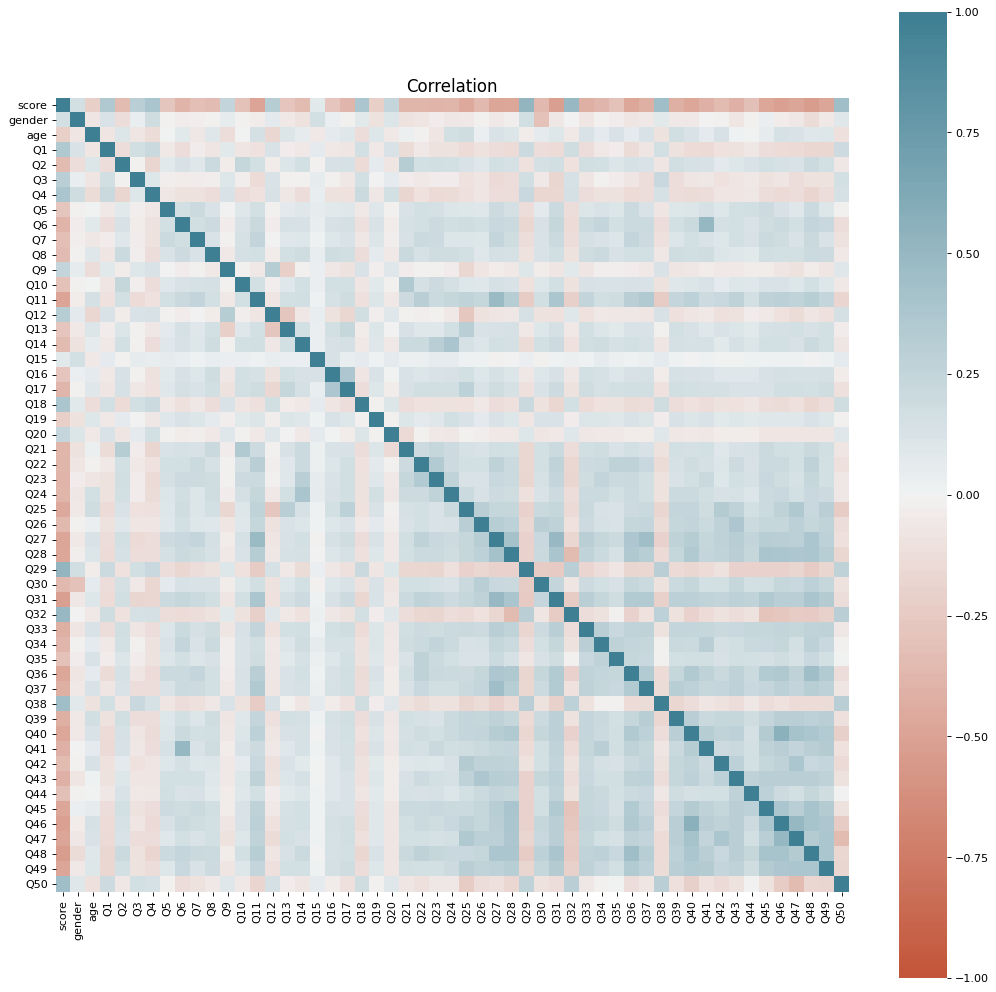

In [ ]:
# Heatmap:
plt.figure(figsize=(16,16),dpi=80)
heat = sns.heatmap(corr1, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), square=True)
plt.title("Correlation", fontsize = 15);

## Distribution of Stress Score:

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
score,5406.0,32.328154,9.464788,0.0,27.0,34.0,39.0,50.0
gender,5406.0,1.562338,0.510118,0.0,1.0,2.0,2.0,3.0
age,5406.0,30.115057,11.868119,14.0,21.0,27.0,36.0,79.0
Q1,5406.0,1.639105,0.492101,0.0,1.0,2.0,2.0,2.0
Q2,5406.0,1.601369,0.505282,0.0,1.0,2.0,2.0,2.0
Q3,5406.0,1.675731,0.480625,0.0,1.0,2.0,2.0,2.0
Q4,5406.0,1.472438,0.511006,0.0,1.0,1.0,2.0,2.0
Q5,5406.0,1.322789,0.480851,0.0,1.0,1.0,2.0,2.0
Q6,5406.0,1.204403,0.423442,0.0,1.0,1.0,1.0,2.0
Q7,5406.0,1.238809,0.445077,0.0,1.0,1.0,1.0,2.0


Text(0.5, 1.0, 'Distribution of Stress Score')

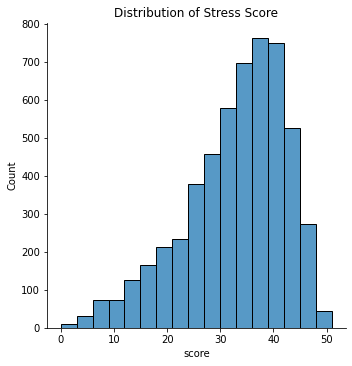

In [ ]:
sns.displot(data, x="score", binwidth=3)
plt.title("Distribution of Stress Score")

Text(0.5, 1.0, 'Stress score density distribution')

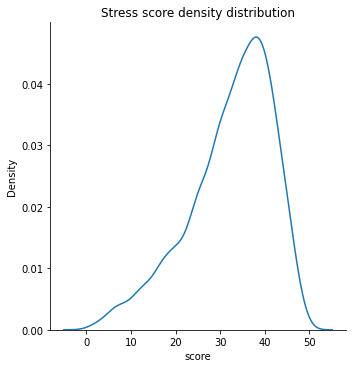

In [ ]:
sns.displot(data, x="score", kind="kde")
plt.title("Stress score density distribution")

Text(0.5, 1.0, 'Impact of questions on stress score')

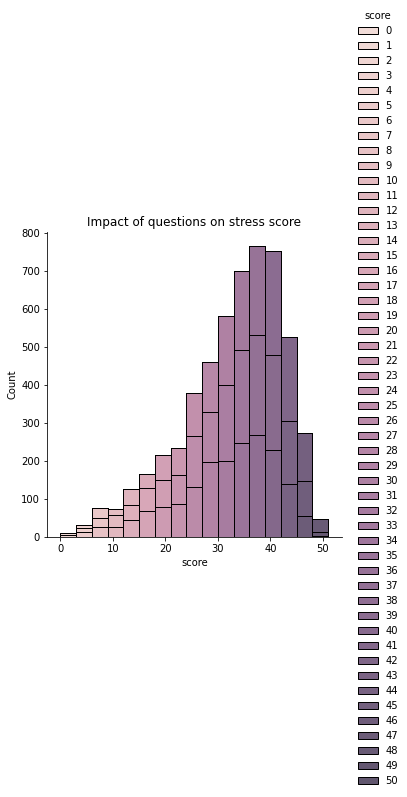

In [ ]:
sns.displot(data, x="score", binwidth=3, hue="score", multiple="stack")
plt.title("Impact of questions on stress score")

## Stress Score vs. Age and Gender:

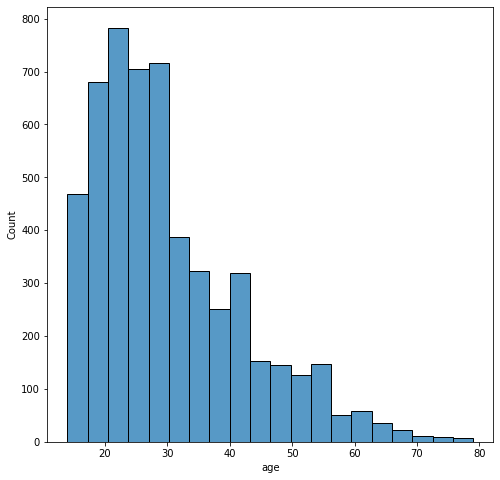

In [ ]:
plt.figure(figsize=(8,8))
sns.histplot(data=data, x="age", bins=20)

Text(0.5, 1.0, 'Relationship between Age and Stress Score')

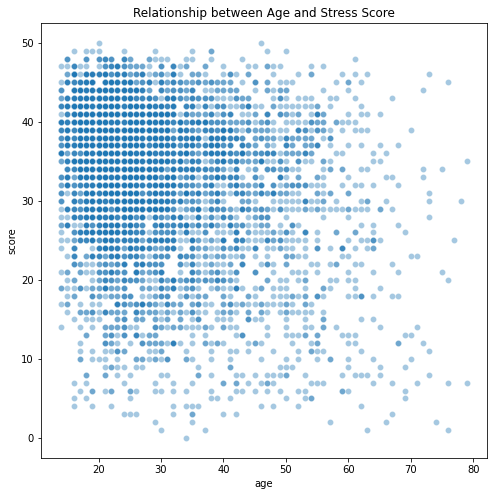

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=data, x= "age", y="score", alpha=0.4)
plt.title("Relationship between Age and Stress Score")

Text(0.5, 1.0, 'Relationship between age and stress score')

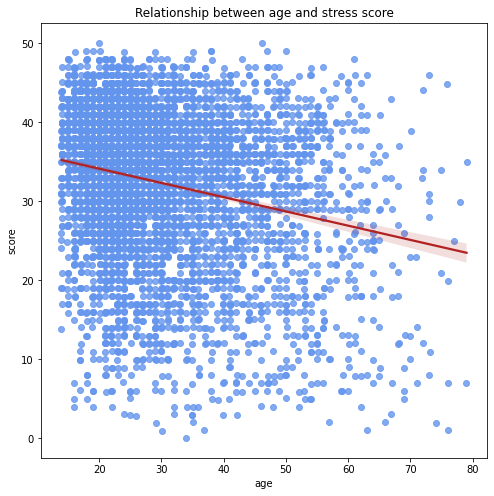

In [ ]:
plt.figure(figsize=(8,8))
sns.regplot(data=data, x= "age", y="score", y_jitter=0.1, x_jitter=0.1, scatter_kws={"color": "cornflowerblue"}, line_kws={"color": "firebrick"})
plt.title("Relationship between age and stress score")

In [ ]:
data.gender.value_counts()

2    2991
1    2377
3      29
0       9
Name: gender, dtype: int64

Text(0.5, 0, 'Gender')

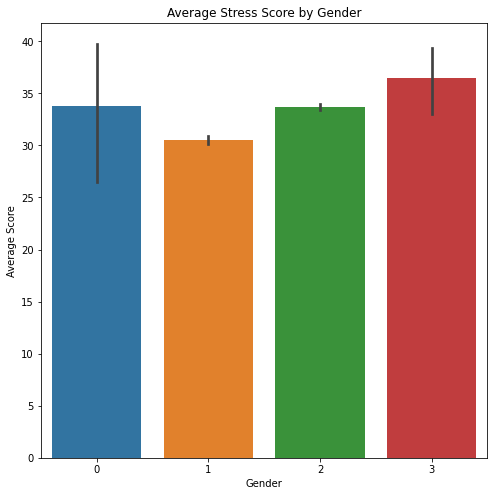

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(data=data, x="gender", y="score")
plt.title("Average Stress Score by Gender")
plt.ylabel("Average Score")
plt.xlabel("Gender")

## Top 5 Questions that Increased Stress Score:

In [ ]:
list_score = [data["Q1"].value_counts()[2],
data["Q2"].value_counts()[1],
data["Q3"].value_counts()[2],
data["Q4"].value_counts()[2],
data["Q5"].value_counts()[1],
data["Q6"].value_counts()[1],
data["Q7"].value_counts()[1],
data["Q8"].value_counts()[1],
data["Q9"].value_counts()[2],
data["Q10"].value_counts()[1],
data["Q11"].value_counts()[1],
data["Q12"].value_counts()[2],
data["Q13"].value_counts()[1],
data["Q14"].value_counts()[1],
data["Q15"].value_counts()[2],
data["Q16"].value_counts()[1],
data["Q17"].value_counts()[1],
data["Q18"].value_counts()[2],
data["Q19"].value_counts()[1],
data["Q20"].value_counts()[2],
data["Q21"].value_counts()[1],
data["Q22"].value_counts()[1],
data["Q23"].value_counts()[1],
data["Q24"].value_counts()[1],
data["Q25"].value_counts()[1],
data["Q26"].value_counts()[1],
data["Q27"].value_counts()[1],
data["Q28"].value_counts()[1],
data["Q29"].value_counts()[2],
data["Q30"].value_counts()[1],
data["Q31"].value_counts()[1],
data["Q32"].value_counts()[2],
data["Q33"].value_counts()[1],
data["Q34"].value_counts()[1],
data["Q35"].value_counts()[1],
data["Q36"].value_counts()[1],
data["Q37"].value_counts()[1],
data["Q38"].value_counts()[2],
data["Q39"].value_counts()[1],
data["Q40"].value_counts()[1],
data["Q41"].value_counts()[1],
data["Q42"].value_counts()[1],
data["Q43"].value_counts()[1],
data["Q44"].value_counts()[1],
data["Q45"].value_counts()[1],
data["Q46"].value_counts()[1],
data["Q47"].value_counts()[1],
data["Q48"].value_counts()[1],
data["Q49"].value_counts()[1],
data["Q50"].value_counts()[2]]

sorted_score = sorted(list_score)
top5 = sorted_score[-5:]
print(top5)
top5_index = [list_score.index(sorted_score[-1])+1,list_score.index(sorted_score[-2])+1,list_score.index(sorted_score[-3])+1,list_score.index(sorted_score[-4])+1,list_score.index(sorted_score[-5])+1]
top5_index
#print(data["Q11"].value_counts()[1])

[4524, 4592, 4600, 4681, 4833]


[27, 37, 50, 42, 11]

## Response Rate of Each Question (%):

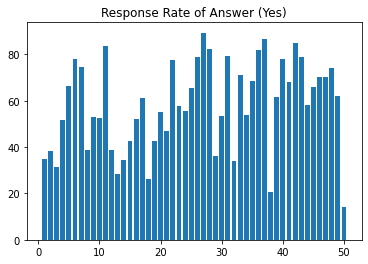

In [ ]:
# Response Rate of Answer(1)
d_rate=[]
for i in data.columns[3:53]:
  d_rate.append(data[i].value_counts(1)[1]*100)
xis=range(1,51)
plt.title('Response Rate of Answer (Yes)')
a=plt.bar(xis,height=d_rate,width=0.8)

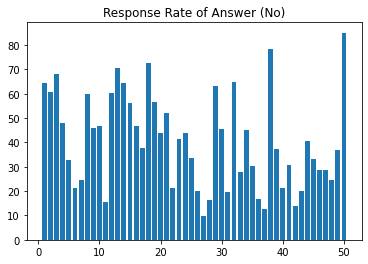

In [ ]:
# Response Rate of Answer(2)
d_rate=[]
for i in data.columns[3:53]:
  d_rate.append(data[i].value_counts(1)[2]*100)
xis=range(1,51)
plt.title('Response Rate of Answer (No)')
a=plt.bar(xis,height=d_rate,width=0.8)

# Dimensionality Reduction


## Principal Component Analysis (PCA):

In [ ]:
# Preprocessing the Data for PCA
## Removing the score
data_pca = data.drop(columns=["score","gender","age"])

data_pca.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50
0,2,2,2,1,2,1,2,2,1,2,1,1,2,2,2,1,1,1,1,2,2,1,1,1,1,1,1,1,2,1,1,1,1,2,1,1,1,1,1,1,2,1,1,1,2,1,1,1,2,2
1,1,2,1,1,2,1,1,2,1,2,1,1,2,2,2,2,1,1,2,2,2,2,1,1,1,1,2,1,1,2,2,1,2,2,1,2,1,2,2,2,1,1,2,2,2,2,2,2,2,2
2,2,1,1,2,1,1,1,1,1,1,1,2,1,2,1,2,1,2,2,2,1,1,2,1,1,1,1,1,2,1,1,2,1,1,1,1,1,2,1,1,1,1,1,2,1,1,2,1,1,2
3,1,2,2,1,1,1,1,2,2,2,1,2,2,2,1,1,2,1,2,1,2,1,1,2,1,1,1,1,2,2,2,2,2,1,1,1,1,2,1,1,1,2,1,1,1,1,1,2,1,2
4,1,2,2,1,1,2,1,1,1,1,1,2,2,2,1,1,1,2,2,2,1,1,1,2,1,2,1,1,1,2,1,2,1,1,1,1,1,2,1,1,2,1,1,1,1,1,2,1,1,2


In [ ]:
# Transforming the Data for some of the questions
for i in range(50):
  q = i
  if i in [2,5,6,7,8,10,11,13,14,16,17,19,21,22,23,24,25,26,27,28,30,31,33,34,35,36,37,39,40,41,42,43,44,45,46,47,48,49]:
    pass
  else:
    data_pca.iloc[:,q].replace([1],3,inplace=True)
    data_pca.iloc[:,q].replace([2],1,inplace=True)
    data_pca.iloc[:,q].replace([3],2,inplace=True)

In [ ]:
# Fitting our PCA Model:
pca = PCA(random_state=820)
pcs = pca.fit_transform(data_pca)

print(type(pcs))
print(pcs.shape)

<class 'numpy.ndarray'>
(5406, 50)


In [ ]:
# Variance Explaination Ratio -- PC Explained Variance
varexp = pca.explained_variance_ratio_
print(type(varexp))
print(varexp.shape)
print(np.sum(varexp))

<class 'numpy.ndarray'>
(50,)
1.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


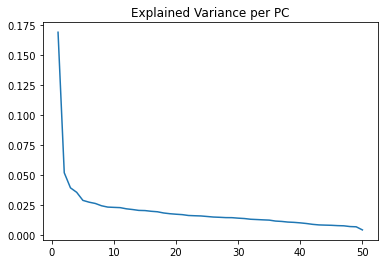

In [ ]:
# Plotting the Variance Explained per Principle Component (PC)
plt.title("Explained Variance per PC")
sns.lineplot(range(1, len(varexp)+1), varexp);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


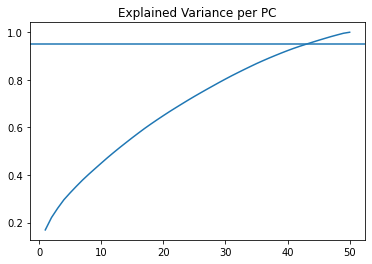

In [ ]:
# Cumulative Running Percentange
plt.title("Explained Variance per PC")
sns.lineplot(range(1, len(varexp)+1), np.cumsum(varexp))
plt.axhline(.95);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


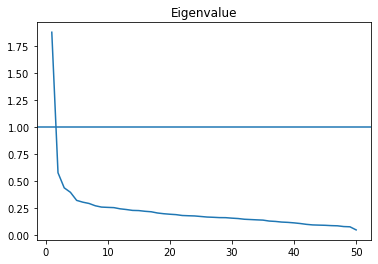

In [ ]:
# Explained Variance - Eigenvalue
explvar = pca.explained_variance_
plt.title("Eigenvalue")
sns.lineplot(range(1, len(explvar)+1), explvar)
plt.axhline(1);

In [ ]:
# We wanted to see how much of our variance is explained by each of the 50 PCAs.
np.cumsum(pca.explained_variance_ratio_[:50])

array([0.16915475, 0.22109981, 0.26047409, 0.29611758, 0.32503808,
       0.3524493 , 0.37878978, 0.4032124 , 0.42653219, 0.44961164,
       0.47247822, 0.49435593, 0.51564348, 0.53620187, 0.556613  ,
       0.57643262, 0.59584976, 0.61425652, 0.63205345, 0.64942181,
       0.66644721, 0.68275881, 0.69885947, 0.71478536, 0.73026227,
       0.74528134, 0.76008934, 0.77463257, 0.78912773, 0.80321879,
       0.81698812, 0.83016396, 0.84309356, 0.85576842, 0.86822117,
       0.87989105, 0.89124982, 0.9020739 , 0.91264686, 0.92280519,
       0.93241992, 0.9413368 , 0.94978725, 0.95806465, 0.96619687,
       0.9740551 , 0.98175957, 0.98884046, 0.99572098, 1.        ])

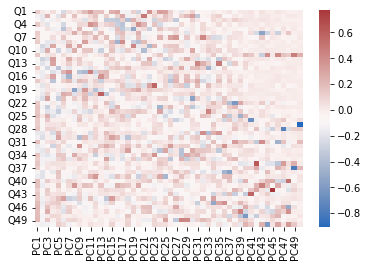

In [ ]:
################# loadings matrix
# component, feature
comps = pca.components_
COLS = ["PC" + str(i) for i in range(1, len(comps)+1)]
loadings = pd.DataFrame(comps.T, columns=COLS, index=data_pca.columns) 

sns.heatmap(loadings, cmap="vlag");

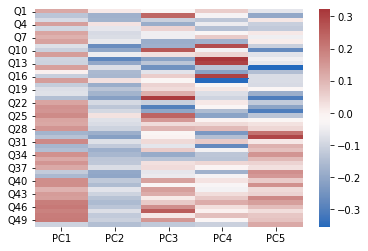

In [ ]:
# Hard to establish correlations with only 5 PCAs, as we originally intended
sns.heatmap(loadings.iloc[:, :5], cmap="vlag");

## TSNE:

In [ ]:
# Fitting our TSNE Model:
tsne = TSNE(random_state=820)
tsne.fit(pcs)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


TSNE(random_state=820)

In [ ]:
# Getting the Embeddings
te = tsne.embedding_

# The Shape
te.shape

(5406, 2)

In [ ]:
# Visualizing the Data
tdata = pd.DataFrame(te, columns=['E1', 'E2'])
tdata.head(3)

,E1,E2
0,23.127834,-22.091957
1,7.336479,-50.272873
2,-12.478639,46.419163


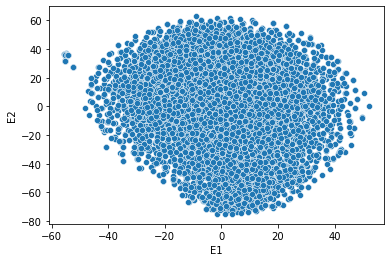

In [ ]:
# The Plot
PAL = sns.color_palette("bright", 10) 
plt.figure(figsize=(6, 4))
sns.scatterplot(x="E1", y="E2", data=tdata);

## UMAP:

In [ ]:
# Fitting our UMAP Model:
u = UMAP(random_state=820, n_neighbors=10)
u.fit(pcs)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


UMAP(n_neighbors=10, random_state=820, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [ ]:
# The Embeddings:
embeds = u.transform(pcs)

# The Shape:
embeds.shape

(5406, 2)

In [ ]:
# Visualizing the Data:
umap_df = pd.DataFrame(embeds, columns=["E1", "E2"])

umap_df.head(3)

,E1,E2
0,19.672972,-4.460889
1,17.292738,-1.827577
2,24.883717,-7.800910


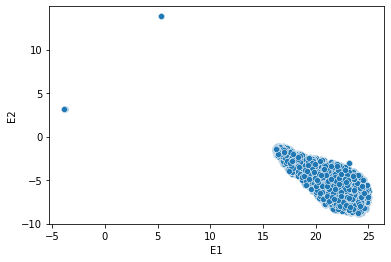

In [ ]:
# The Plot:
sns.scatterplot(x="E1", y="E2", data=umap_df);

# Clustering

## Clustering Respondents

### Hierarchical Clustering:

In [ ]:
data_cluster1 = data.drop(columns=["score","gender","age"])

In [ ]:
# Distance Matrix
dist_eu = pdist(data_cluster1, metric="euclidean")
dist_cos = pdist(data_cluster1, metric="cosine")
dist_mht = pdist(data_cluster1, metric="cityblock")

print(np.isnan(dist_eu).sum())
print(np.isnan(dist_cos).sum())
print(np.isnan(dist_mht).sum())

0
48609
0


In [ ]:
method = ['single', 'complete', 'average', 'ward']

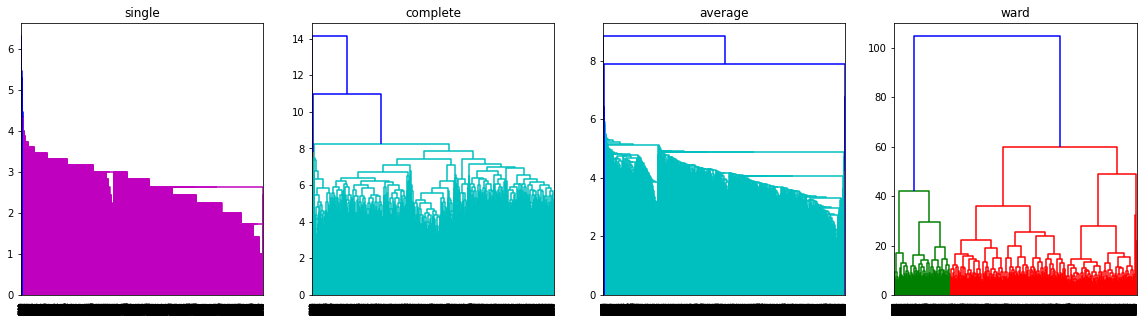

In [ ]:
## Euclidean Distance
plt.figure(figsize=(20,5))
for i, m in enumerate(method):
  plt.subplot(1, 4, i+1)
  plt.title(m)
  dendrogram(linkage(dist_eu, method=m), leaf_rotation=90)
plt.show()

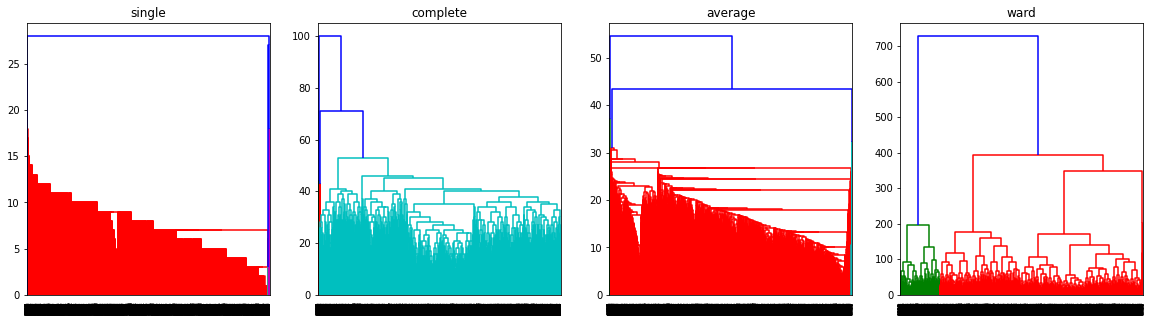

In [ ]:
## Manhattan Distance
plt.figure(figsize=(20,5))
for i, m in enumerate(method):
  plt.subplot(1, 4, i+1)
  plt.title(m)
  dendrogram(linkage(dist_mht, method=m), leaf_rotation=90)
plt.show()

Decided to use Euclidean - Ward method

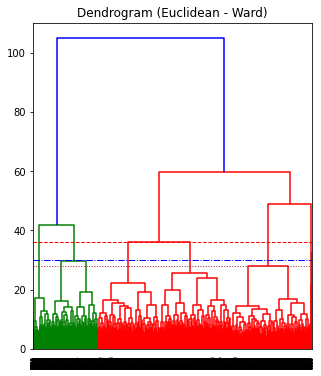

In [ ]:
hc1 = linkage(dist_eu, method="ward")

plt.figure(figsize=(5,6))
dendrogram(hc1, leaf_rotation=90)
plt.axhline(y=36, c='red', lw=1, linestyle='dashed')
plt.axhline(y=30, c='blue', lw=1, linestyle='dashdot')
plt.axhline(y=28, c='brown', lw=1, linestyle='dotted')
plt.title("Dendrogram (Euclidean - Ward)")
plt.show()

In [ ]:
c1 = fcluster(hc1, 6, criterion="maxclust")
print(np.unique(c1, return_counts=True))
c2 = fcluster(hc1, 9, criterion="maxclust")
print(np.unique(c2, return_counts=True))

(array([1, 2, 3, 4, 5, 6], dtype=int32), array([ 356,  905, 1196, 1391, 1520,   38]))
(array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32), array([ 356,  450,  455, 1196, 1391,  811,  709,   19,   19]))


### K-mean Clustering:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


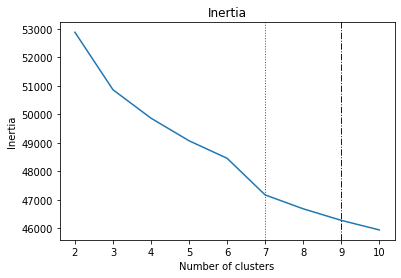

In [ ]:
inertias = {}

for i in range(2, 11):
    model = KMeans(i, random_state=820)
    model.fit(data_cluster1)
    inertia = model.inertia_
    inertias[i] = inertia

inertias

sns.lineplot(inertias.keys(), inertias.values())
plt.title("Inertia")
plt.ylabel("Inertia")
plt.xlabel("Number of clusters")
plt.axvline(x=7, c='brown', lw=1, linestyle='dotted')
plt.axvline(x=9, c='blue', lw=1, linestyle='dashdot')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


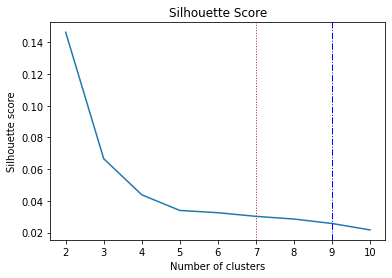

In [ ]:
silos = {}

for i in range(2,11):
    model = KMeans(i, random_state=820)
    model.fit(data_cluster1)
    silo = metrics.silhouette_score(data_cluster1, model.predict(data_cluster1))
    silos[i] = silo

silos

sns.lineplot(silos.keys(), silos.values())
plt.title("Silhouette Score")
plt.ylabel("Silhouette score")
plt.xlabel("Number of clusters")
plt.axvline(x=7, c='brown', lw=1, linestyle='dotted')
plt.axvline(x=9, c='blue', lw=1, linestyle='dashdot')
plt.show()

In [ ]:
k7 = KMeans(7)
k9 = KMeans(9)

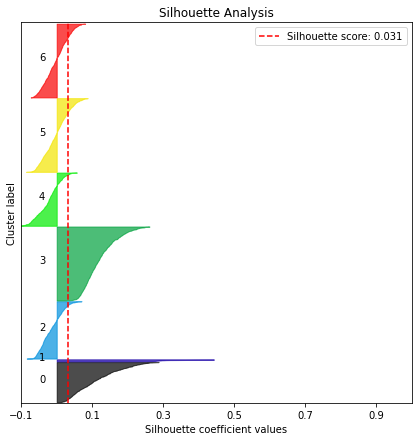

In [ ]:
skplt.metrics.plot_silhouette(data_cluster1, k7.fit_predict(data_cluster1), figsize=(7,7))
plt.show()

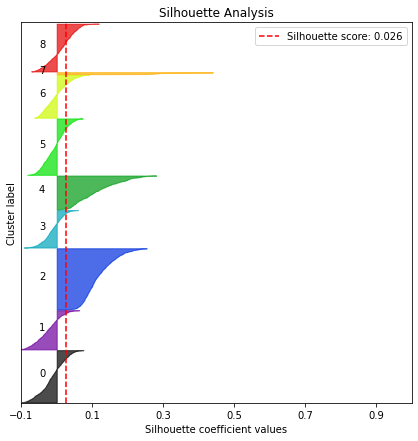

In [ ]:
skplt.metrics.plot_silhouette(data_cluster1, k9.fit_predict(data_cluster1), figsize=(7,7))
plt.show()

In [ ]:
data_label = data.copy()

data_label["hc_6"] = c1
data_label["hc_9"] = c2
data_label["k7"] = k7.fit_predict(data_cluster1)
data_label["k9"] = k9.fit_predict(data_cluster1)

In [ ]:
counts_dict = dict( hc_6 = data_label["hc_6"].value_counts(),
                    hc_9 = data_label["hc_9"].value_counts(),
                    k7 = data_label["k7"].value_counts(),
                    k9 = data_label["k9"].value_counts())

cluster_counts = pd.DataFrame.from_dict(counts_dict, orient="columns")

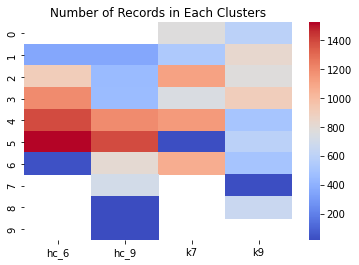

In [ ]:
sns.heatmap(cluster_counts, cmap="coolwarm")
plt.title("Number of Records in Each Clusters")
plt.show()

In [ ]:
data_label.groupby("hc_6")[["score", "age"]].mean()

,score,age
hc_6,,
1,12.070225,36.601124
2,23.996685,31.358011
3,36.041806,28.742475
4,30.442847,30.537024
5,41.228947,28.442763
6,16.631579,34.394737


In [ ]:
questions = ["Q" + str(i) for i in range(1,51)]

In [ ]:
cluster_1 = data_label[data_label["hc_6"]==1]
cluster_1[questions].apply(pd.Series.value_counts)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50
0,1,2,NaN,3,1,3,2,1,5,NaN,NaN,4,2,1,1,1,2,2,NaN,NaN,3,1,3,1,NaN,NaN,1,1,NaN,1,2,3,1,2,1,2,1,NaN,NaN,NaN,3,2,3,2,3,2,1,1,2,3
1,250,36,258.0,292,153,144,153,50,269,85.0,89.0,231,18,12,194,80,97,195,82.0,264.0,51,128,67,67,46.0,108.0,106,75,306.0,53,49,316,93,84,141,118,138,261.0,66.0,75.0,101,151,98,82,53,31,26,44,36,225
2,105,318,98.0,61,202,209,201,305,82,271.0,267.0,121,336,343,161,275,257,159,274.0,92.0,302,227,286,288,310.0,248.0,249,280,50.0,302,305,37,262,270,214,236,217,95.0,290.0,281.0,252,203,255,272,300,323,329,311,318,128


In [ ]:
cluster_1.gender.value_counts()

1    206
2    148
3      1
0      1
Name: gender, dtype: int64

In [ ]:
cluster_2 = data_label[data_label["hc_6"]==2]
cluster_2[questions].apply(pd.Series.value_counts)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50
0,1,8,8,2,2,3,2,7,3,4,4,4,4,10,5,9,3,5,5,4,4,6,3,1,3,4,3,3,1,4,4,4,6,4,1,2,2,1,4,3,3,2,6,2,3,10,7,4,1,2
1,414,238,303,609,446,570,498,221,512,376,598,412,175,199,372,398,452,376,299,576,297,562,349,356,472,633,711,524,560,346,508,613,498,304,511,491,693,299,395,454,398,703,552,344,234,284,395,338,296,215
2,490,659,594,294,457,332,405,677,390,525,303,489,726,696,528,498,450,524,601,325,604,337,553,548,430,268,191,378,344,555,393,288,401,597,393,412,210,605,506,448,504,200,347,559,668,611,503,563,608,688


In [ ]:
cluster_2.gender.value_counts()

2    462
1    442
3      1
Name: gender, dtype: int64

In [ ]:
cluster_3 = data_label[data_label["hc_6"]==3]
cluster_3[questions].apply(pd.Series.value_counts)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50
0,4,7,3,3,4,9,9,7,4,7,4,7,13,5,13,11,13,9,7,12,10,9,7,5,9,10,5,6,1,7,6,4,7,3,3,14,5,5,2,3,5,4,6,12,4,2,5,5,6,3
1,341,371,257,605,869,1029,960,443,538,512,1112,291,449,393,507,665,816,252,596,747,396,998,665,720,1030,1091,1176,1141,278,741,1095,253,995,645,873,1111,1147,125,876,1111,918,1133,1096,789,961,1067,1064,1028,925,59
2,851,818,936,588,323,158,227,746,654,677,80,898,734,798,676,520,367,935,593,437,790,189,524,471,157,95,15,49,917,448,95,939,194,548,320,71,44,1066,318,82,273,59,94,395,231,127,127,163,265,1134


In [ ]:
cluster_3.gender.value_counts()

2    671
1    511
3     10
0      4
Name: gender, dtype: int64

In [ ]:
cluster_4 = data_label[data_label["hc_6"]==4]
cluster_4[questions].apply(pd.Series.value_counts)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50
0,8,8,5,5,4,8,7,10,10,4,8,9,7,14,10,11,7,7,4,6,12,9,5,2,NaN,6,5,6,2,3,8,10,3,3,5,12,6,11,5,7,9,9,9,14,12,10,6,17,5,3
1,604,431,519,825,943,1038,1079,455,850,707,1220,707,266,400,598,620,704,432,509,780,567,1050,745,674,702.0,1014,1320,1234,622,574,1142,478,865,647,900,1213,1204,327,715,1112,876,1162,1076,748,949,971,910,1110,764,220
2,779,952,867,561,444,345,305,926,531,680,163,675,1118,977,783,760,680,952,878,605,812,332,641,715,689.0,371,66,151,767,814,241,903,523,741,486,166,181,1053,671,272,506,220,306,629,430,410,475,264,622,1168


In [ ]:
cluster_4.gender.value_counts()

2    709
1    675
3      7
Name: gender, dtype: int64

In [ ]:
cluster_5 = data_label[data_label["hc_6"]==5]
cluster_5[questions].apply(pd.Series.value_counts)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50
0,3,3,1,3,6,6,8,12,9,9,5,9,5,9,21,11,9,3,4,6,14,8,9,1,7,7,4,9,4,11,1,8,6,4,9,12,5,6,6,4,11,8,8,13,8,10,11,6,8,1
1,272,988,338,445,1168,1416,1325,927,693,1161,1493,448,618,850,623,1047,1240,167,818,613,1210,1449,1285,1176,1289,1405,1514,1476,184,1167,1485,188,1393,1230,1283,1491,1493,101,1287,1453,1378,1440,1431,1170,1355,1436,1398,1478,1322,45
2,1245,529,1181,1072,346,98,187,581,818,350,22,1063,897,661,876,462,271,1350,698,901,296,63,226,343,224,108,2,35,1332,342,34,1324,121,286,228,17,22,1413,227,63,131,72,81,337,157,74,111,36,190,1474


In [ ]:
cluster_5.gender.value_counts()

2    981
1    526
3     10
0      3
Name: gender, dtype: int64

In [ ]:
cluster_6 = data_label[data_label["hc_6"]==6]
cluster_6[questions].apply(pd.Series.value_counts)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50
0,14,14,15,16,17,16,16,18,16,18,19,19,19,19,18,17,17,18,17,20,20,19,20,20,20,30,30,31,31,30,30,32,31,31,31,31,30,30,30,30,30,30,30,30,30,30,29,29,29,29
1,8,7,14,12,14,14,12,11,13,3,12,8,7,4,11,12,12,6,6,10,7,13,9,7,10,6,6,6,1,5,6,1,3,2,4,6,6,3,3,5,6,3,5,5,4,4,5,7,7,1
2,16,17,9,10,7,8,10,9,9,17,7,11,12,15,9,9,9,14,15,8,11,6,9,11,8,2,2,1,6,3,2,5,4,5,3,1,2,5,5,3,2,5,3,3,4,4,4,2,2,8


In [ ]:
cluster_6.gender.value_counts()

2    20
1    17
0     1
Name: gender, dtype: int64

## Clustering Questions

### K-Means Clustering:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


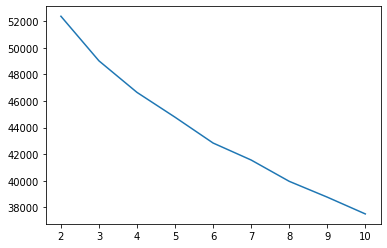

In [ ]:
data_k = data.copy()
data_k.drop(columns=["score","gender","age"],inplace=True)
for i in range(50):
  q = i
  if i in [2,5,6,7,8,10,11,13,14,16,17,19,21,22,23,24,25,26,27,28,30,31,33,34,35,36,37,39,40,41,42,43,44,45,46,47,48,49]:
    pass
  else:
    data_k.iloc[:,q].replace([1],3,inplace=True)
    data_k.iloc[:,q].replace([2],1,inplace=True)
    data_k.iloc[:,q].replace([3],2,inplace=True)

data_temp2 = data_k.copy().T
KRANGE = range(2, 11)

# a container
ss = []

for k in KRANGE:
    km = KMeans(k)
    lab = km.fit_predict(data_temp2)
    ss.append(km.inertia_)

sns.lineplot(KRANGE, ss)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


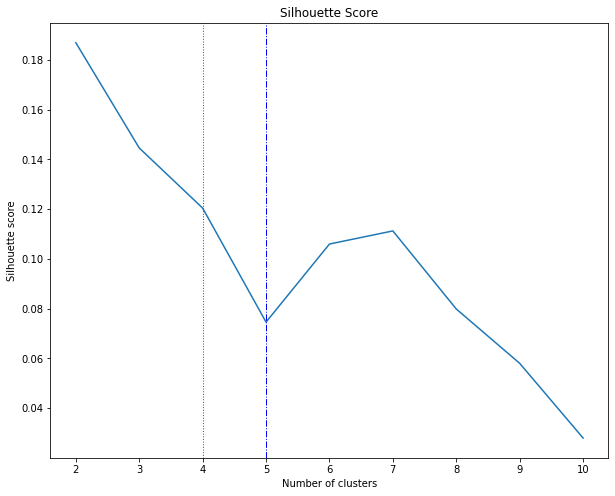

In [ ]:
silos = {}
for i in range(2,11):
    model = KMeans(i, random_state=820)
    model.fit(data_temp2)
    silo = metrics.silhouette_score(data_temp2, model.predict(data_temp2))
    silos[i] = silo
plt.figure(figsize=(10, 8))
sns.lineplot(silos.keys(), silos.values())
plt.title("Silhouette Score")
plt.ylabel("Silhouette score")
plt.xlabel("Number of clusters")
plt.axvline(x=4, c='brown', lw=1, linestyle='dotted')
plt.axvline(x=5, c='blue', lw=1, linestyle='dashdot')
plt.show()

In [ ]:
# fit our first kmeans cluster!
k4 = KMeans(4)
k4.fit(data_temp2)
test = k4.predict(data_temp2)
test.shape

(50,)

<Figure size 360x288 with 0 Axes>

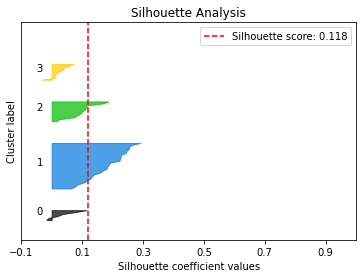

In [ ]:
# silhouette plot
plt.figure(figsize=(5, 4))
skplt.metrics.plot_silhouette(data_temp2, test)

In [ ]:
data_temp2["group"]= test

In [ ]:
data_temp2["group"]

Q1     1
Q2     3
Q3     2
Q4     0
Q5     2
Q6     1
Q7     1
Q8     0
Q9     3
Q10    3
Q11    1
Q12    2
Q13    3
Q14    0
Q15    2
Q16    3
Q17    1
Q18    2
Q19    3
Q20    3
Q21    3
Q22    1
Q23    0
Q24    0
Q25    1
Q26    1
Q27    1
Q28    1
Q29    2
Q30    3
Q31    1
Q32    2
Q33    2
Q34    0
Q35    1
Q36    1
Q37    1
Q38    2
Q39    2
Q40    1
Q41    1
Q42    1
Q43    1
Q44    1
Q45    1
Q46    1
Q47    1
Q48    1
Q49    1
Q50    2
Name: group, dtype: int32

In [ ]:
print(data_temp2[data_temp2["group"]==0].index.values.tolist())
print(data_temp2[data_temp2["group"]==1].index.values.tolist())
print(data_temp2[data_temp2["group"]==2].index.values.tolist())
print(data_temp2[data_temp2["group"]==3].index.values.tolist())

['Q4', 'Q8', 'Q14', 'Q23', 'Q24', 'Q34']
['Q1', 'Q6', 'Q7', 'Q11', 'Q17', 'Q22', 'Q25', 'Q26', 'Q27', 'Q28', 'Q31', 'Q35', 'Q36', 'Q37', 'Q40', 'Q41', 'Q42', 'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48', 'Q49']
['Q3', 'Q5', 'Q12', 'Q15', 'Q18', 'Q29', 'Q32', 'Q33', 'Q38', 'Q39', 'Q50']
['Q2', 'Q9', 'Q10', 'Q13', 'Q16', 'Q19', 'Q20', 'Q21', 'Q30']


In [ ]:
print("Q4. I have very few headaches.")
print("Q8. I frequently notice my hand shakes when I try to do something.")
print("Q14. I have nightmares every few nights.")
print("Q23. My sleep is fitful and disturbed.")
print("Q24. I dream frequently about things that are best kept to myself.")
print("Q34. I have periods of such great restlessness that I cannot sit long I a chair.")

Q4. I have very few headaches.
Q8. I frequently notice my hand shakes when I try to do something.
Q14. I have nightmares every few nights.
Q23. My sleep is fitful and disturbed.
Q24. I dream frequently about things that are best kept to myself.
Q34. I have periods of such great restlessness that I cannot sit long I a chair.


# Text Analysis

In [ ]:
# Reading the Data
data = pd.read_csv("https://raw.githubusercontent.com/David855008/820_project/main/data.csv")
text = pd.read_csv("https://raw.githubusercontent.com/David855008/820_project/main/text.csv")

In [ ]:
stop = stopwords.words('english')
stop = stop + ["things","sometimes","thing","something"]
text['text'] = text['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
text['text_clean'] = text['text'].str.replace('[^\w\s]','').str.replace('[^[-]*\s]',' ').apply(lambda x: " ".join(x for x in x.split() if x not in stop)) 

In [ ]:
cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe('spacytextblob')

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


## Sentiment Analysis:

In [ ]:
analyzer = SentimentIntensityAnalyzer()
afinn = Afinn()
avg = []
avg_switch = []
q_text = []
afinn_score = []
vader_score = []
for i in range(50):
  q = i+3
  if i+1 in [2,5,6,7,8,10,11,13,14,16,17,19,21,22,23,24,25,26,27,28,30,31,33,34,35,36,37,39,40,41,42,43,44,45,46,47,48,49]:
    #print(i+1,":",data.iloc[:,q].value_counts()[1]/5410)\
    avg.append(data.iloc[:,q].value_counts()[1]/5410)
    avg_switch.append(data.iloc[:,q].value_counts()[1]/5410)
    q_text.append(text['text_clean'][i])
  else:
    #print(i+1,":",data.iloc[:,q].value_counts()[2]/5410)
    avg.append(data.iloc[:,q].value_counts()[1]/5410)
    avg_switch.append(data.iloc[:,q].value_counts()[2]/5410)
    q_text.append(text['text_clean'][i])
  # textblob_score.append(TextBlob(text['text'][i]).sentiment.polarity)
  vader_score.append(analyzer.polarity_scores(text['text'][i])['compound'])
  afinn_score.append(afinn.score(text['text'][i]))

In [ ]:
d = {'avg': avg,'avg_switch': avg_switch,'text':text['text'],'text_clean': q_text,'afinn_score':afinn_score,'vader_score':vader_score}
df = pd.DataFrame(data=d)
df.sort_values(by='vader_score',ascending=True).head()

,avg,avg_switch,text,text_clean,afinn_score,vader_score
48,0.619409,0.619409,i shrink from facing crisis of difficulty.,shrink facing crisis difficulty,-3.0,-0.7579
1,0.382994,0.382994,i am troubled by attacks of nausea.,troubled attacks nausea,-3.0,-0.7096
21,0.776895,0.776895,i have had periods in which i lost sleep over ...,periods lost sleep worry,-6.0,-0.6369
6,0.744917,0.744917,i worry over money and business.,worry money business,-3.0,-0.4404
10,0.836599,0.836599,i worry quite a bit over possible misfortunes.,worry quite bit possible misfortunes,-3.0,-0.4404


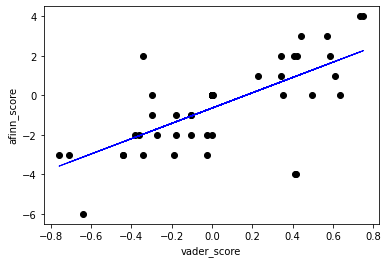

In [ ]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

x = df['vader_score'].values
y = df['afinn_score'].values
x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)
regr = linear_model.LinearRegression()
regr.fit(x, y)

plt.xlabel("vader_score")
plt.ylabel("afinn_score")
plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=1)
plt.show()

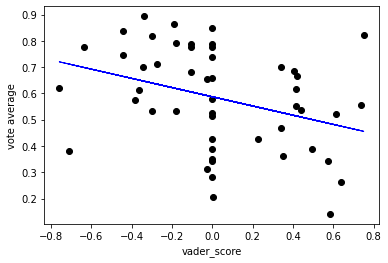

In [ ]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

x = df['vader_score'].values
y = df['avg'].values
x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)
regr = linear_model.LinearRegression()
regr.fit(x, y)

plt.xlabel("vader_score")
plt.ylabel("vote average")
plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=1)
plt.show()

## Word Cloud:

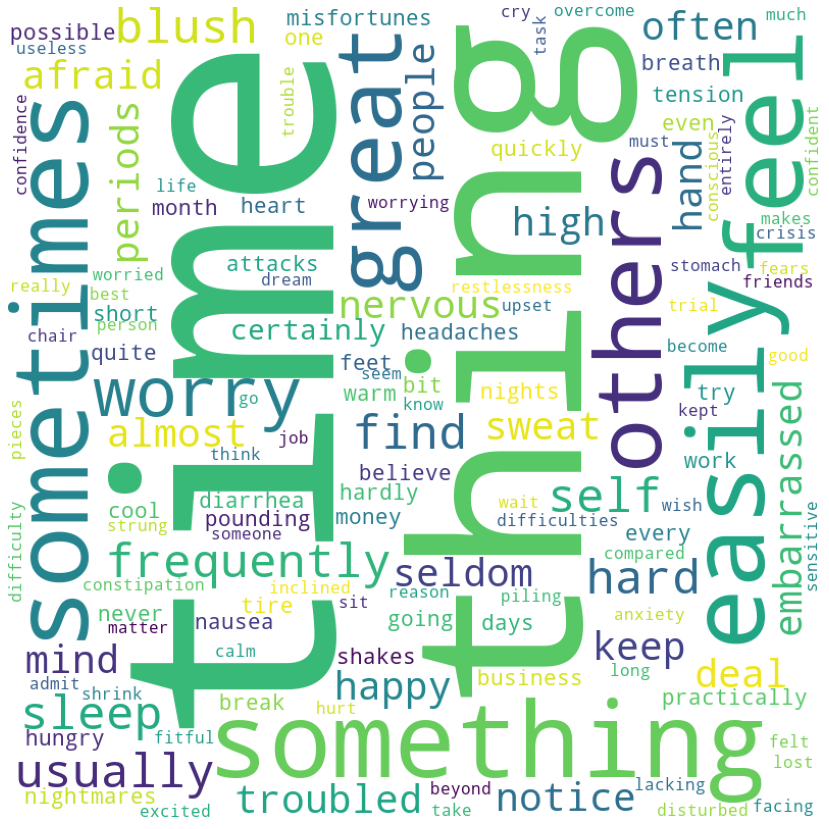

In [ ]:
text_all = ""
text_clean_all = ""
for i in range(50):
  text_all += text['text'][i]
  text_clean_all += text['text_clean'][i]

wc = WordCloud(background_color="white", width=800, height=800)
wordcloud1 = wc.generate(text_all)
plt.figure(figsize = (15,15))
plt.imshow(wordcloud1)
plt.axis("off")
plt.show()

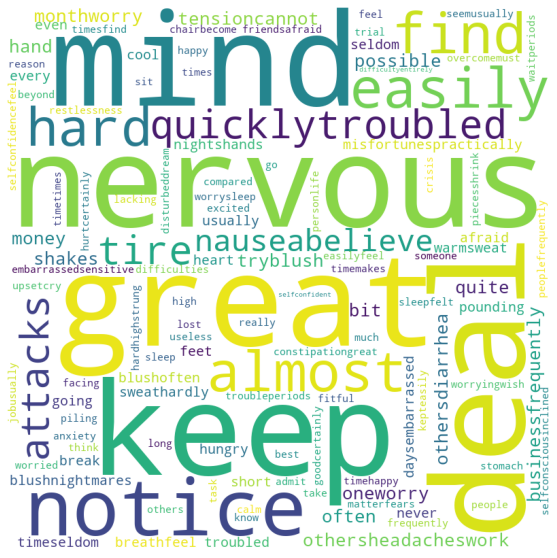

In [ ]:
wordcloud2 = wc.generate(text_clean_all)
plt.figure(figsize = (10,10))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

In [ ]:
df.sort_values(by='avg_switch',ascending=False).head()

,avg,avg_switch,text,text_clean,afinn_score,vader_score
26,0.893346,0.893346,i frequently find myself worrying about someth...,frequently find worrying,-3.0,-0.3400
36,0.865434,0.865434,i must admit that i have at times been worried...,must admit times worried beyond reason really ...,-3.0,-0.1871
49,0.141405,0.850462,i am entirely self-confident.,entirely selfconfident,2.0,0.5849
41,0.848799,0.848799,i am usually self-conscious.,usually selfconscious,0.0,0.0000
10,0.836599,0.836599,i worry quite a bit over possible misfortunes.,worry quite bit possible misfortunes,-3.0,-0.4404
